In [ ]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import files


uploaded = files.upload()


In [ ]:
import pandas as pd

# Read the CSV files
true_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')

# Display the first few rows of each DataFrame
print("True.csv:")
display(true_news.head())

print("Fake.csv:")
display(fake_news.head())


True.csv:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Fake.csv:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_news.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake_news.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_news.tail(5)

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [ ]:
fake_news.tail(5)

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [ ]:
true_news.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [ ]:
fake_news.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


Pre processing of data

In [ ]:
# Add an 'outcome' column to both datasets
true_news['outcome'] = 1
fake_news['outcome'] = 0




In [ ]:
true_news.head(5)

,title,text,subject,date,outcome
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake_news.head(5)

,title,text,subject,date,outcome
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
true_news.shape, fake_news.shape


((21417, 5), (23481, 5))

Removing last 10 rows from both dataset for manual testing

In [ ]:
# Remove the last 10 rows from each dataset for manual testing
true_news_manual_test = true_news[-10:]
fake_news_manual_test = fake_news[-10:]

true_news = true_news[:-10]
fake_news = fake_news[:-10]


In [ ]:
true_news.shape, fake_news.shape

((21407, 5), (23471, 5))

In [ ]:
true_news_manual_test["outcome"]=1
fake_news_manual_test["outcome"]=0

<ipython-input-15-88e7f2773f0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_news_manual_test["outcome"]=1
<ipython-input-15-88e7f2773f0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_news_manual_test["outcome"]=0


In [ ]:
true_news_manual_test.head(10)

,title,text,subject,date,outcome
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
fake_news_manual_test.head(10)

,title,text,subject,date,outcome
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
news_data = pd.concat([true_news, fake_news], axis=0)
news_data.head(10)

,title,text,subject,date,outcome
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


subject
politicsNews       11272
worldnews          10135
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          768
Name: count, dtype: int64


<ipython-input-19-2d964b1330cb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_frequency.index, y=subject_frequency.values, palette='viridis')


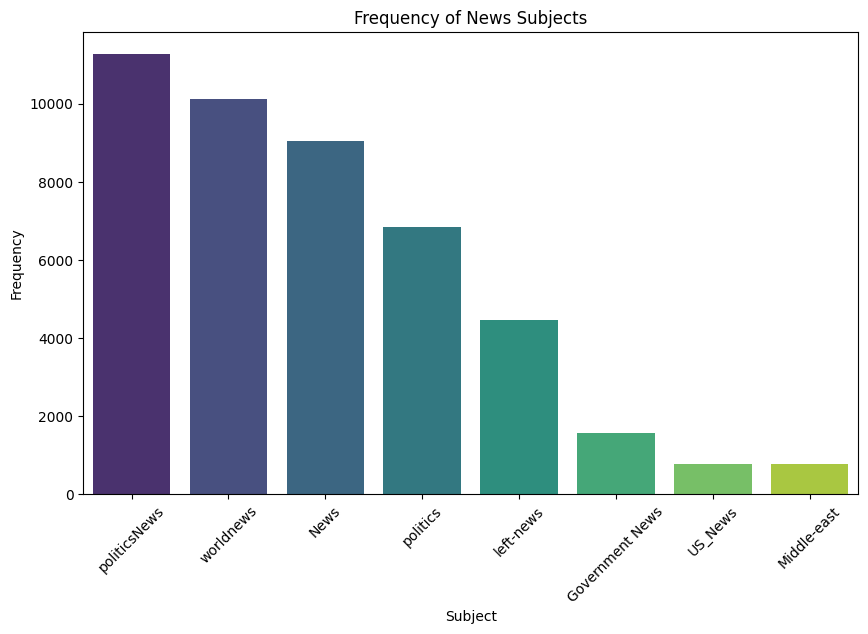

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency of subjects
subject_frequency = news_data['subject'].value_counts()
print(subject_frequency)

# Plotting the frequency of subjects
plt.figure(figsize=(10, 6))
sns.barplot(x=subject_frequency.index, y=subject_frequency.values, palette='viridis')
plt.title('Frequency of News Subjects')
plt.xlabel('Subject')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<ipython-input-20-8aed247bfa3c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=news_outcome_frequency.index, y=news_outcome_frequency.values, palette='viridis')


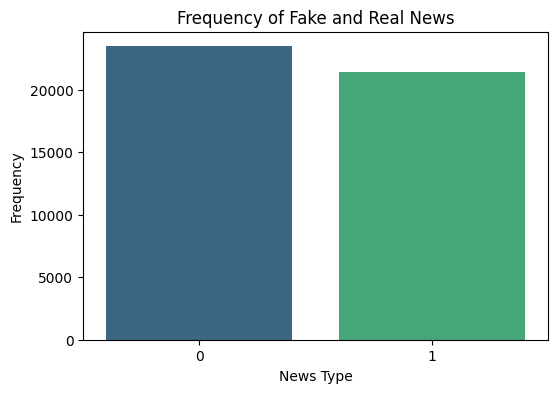

In [ ]:
# Frequency of Fake and Real News
news_outcome_frequency = news_data['outcome'].value_counts()

# Plotting the frequency of Fake and Real News
plt.figure(figsize=(6, 4))
sns.barplot(x=news_outcome_frequency.index, y=news_outcome_frequency.values, palette='viridis')
plt.title('Frequency of Fake and Real News')
plt.xlabel('News Type')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import nltk
from nltk.tokenize import WhitespaceTokenizer

# Sample text for tokenization
sample_text = "This is a sample text for tokenization using WhitespaceTokenizer."

# Tokenizing the text
tokenizer = WhitespaceTokenizer()
tokens = tokenizer.tokenize(sample_text)
print(tokens)


['This', 'is', 'a', 'sample', 'text', 'for', 'tokenization', 'using', 'WhitespaceTokenizer.']


In [ ]:
!pip install wordcloud


<ipython-input-23-7b8c5ccc7c41>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=most_common_df, palette='viridis')


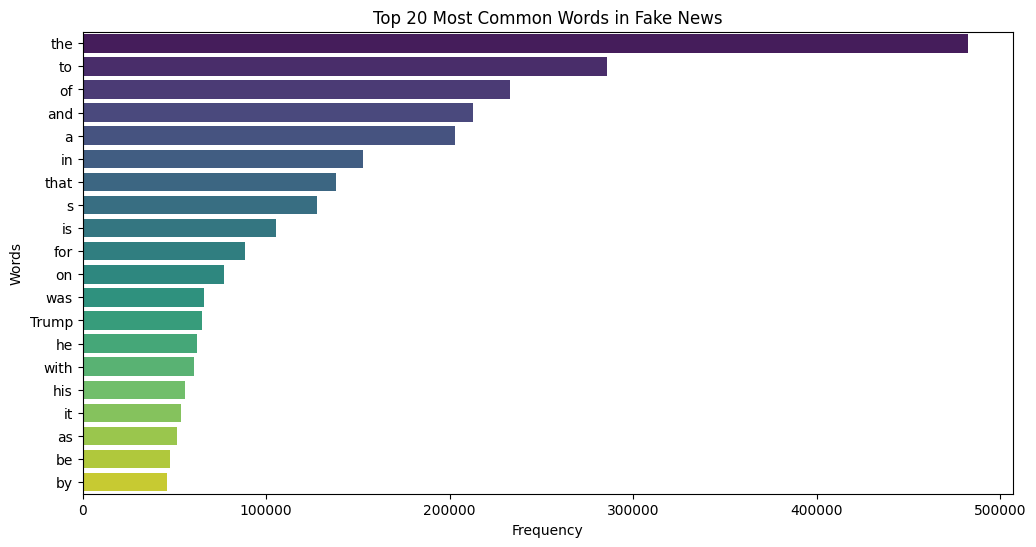

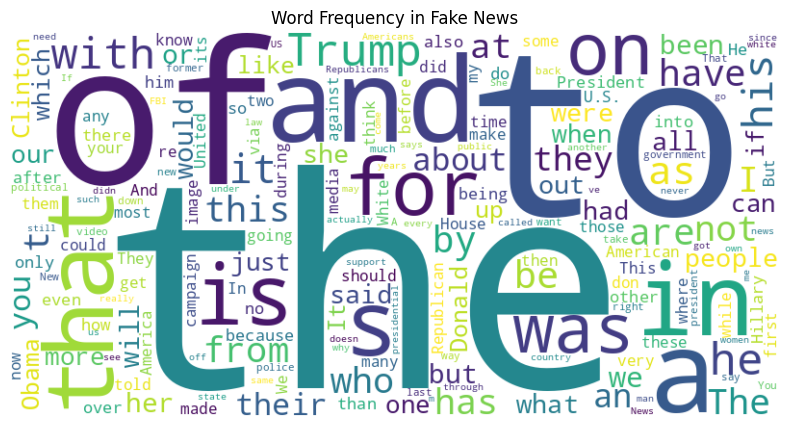

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import WhitespaceTokenizer
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

# Initialize WhitespaceTokenizer
tokenizer = WhitespaceTokenizer()

# Combine all fake news text
fake_news_text = ' '.join(fake_news['text'])

# Tokenize the text
fake_news_tokens = tokenizer.tokenize(fake_news_text)

# Calculate word frequencies
word_freq = Counter(fake_news_tokens)


# Get the 20 most common words
most_common_words = word_freq.most_common(20)

# Convert to DataFrame for plotting
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plotting the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=most_common_df, palette='viridis')
plt.title('Top 20 Most Common Words in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


# Plotting the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Frequency in Fake News')
plt.axis('off')
plt.show()


In [ ]:
news_data.columns

Index(['title', 'text', 'subject', 'date', 'outcome'], dtype='object')

In [ ]:
news_data.outcome.value_counts()

outcome
0    23471
1    21407
Name: count, dtype: int64

In [ ]:
21407/23471

0.9120616931532529

In [ ]:
# Removing the “title”, “subject” and “date” columns
news_data = news_data.drop(columns=['title', 'subject', 'date'])

In [ ]:
news_data.isnull().sum()

text       0
outcome    0
dtype: int64

In [ ]:
news_data=news_data.sample(frac = 1)

In [ ]:
news_data.head()

,text,outcome
17584,MOSCOW (Reuters) - If the United States leaves...,1
12041,Reuters reports:The United States expelled 35 ...,0
18796,"BUKAVU, Democratic Republic of Congo (Reuters)...",1
12903,Debate officials have released the details of ...,0
7911,(Reuters) - Democratic presidential candidate ...,1


In [ ]:
# Randomly shuffling the data frame
news_data = news_data.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
news_data.columns

Index(['text', 'outcome'], dtype='object')

In [ ]:
news_data.head()

,text,outcome
0,"The View co-host, and rabid, liberal, activi...",0
1,After failing to denounce or renounce an endor...,0
2,Hillary Clinton may be favored in the polls to...,0
3,Donald Trump s decision to choose Russian stat...,0
4,And the left says Trump hasn t given details a...,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re

# Function to preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs and links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters and punctuation
    text = re.sub(r'\@\w+|\#|\d+|[^A-Za-z0-9 ]+', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the preprocessing function to the text data
news_data['text'] = news_data['text'].apply(preprocess_text)

# Initialize the CountVectorizer with English stop words
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the text data (using the first 5 rows for demonstration)
count_data = vectorizer.fit_transform(news_data['text'].head())

# Convert the count data to a DataFrame
bow = pd.DataFrame(count_data.toarray(), columns=vectorizer.get_feature_names_out())

# Display the bag-of-words DataFrame
print(bow)

   abc  ability  abortion  accomplish  accused  aclu  act  action  actions  \
0    2        0         0           0        1     0    0       0        0   
1    0        0         0           0        0     1    1       0        0   
2    0        1         1           1        0     0    0       0        2   
3    0        0         0           0        0     0    0       1        1   
4    0        0         0           0        0     0    0       0        0   

   activist  ...  wonder  worked  world  worlds  worried  year  years  yes  \
0         1  ...       0       0      1       1        0     0      0    1   
1         0  ...       0       1      0       0        0     0      2    0   
2         0  ...       0       0      0       0        0     2      1    0   
3         0  ...       1       0      0       0        1     0      0    0   
4         0  ...       0       0      0       0        0     0      0    0   

   youtube  youtubeindeed  
0        0              0  
1     

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split



# Combine the datasets and add a label column
fake_news['label'] = 0  # 0 for Fake news
true_news['label'] = 1  # 1 for Real news
news_data = pd.concat([true_news, fake_news])

# Remove the “title”, “subject” and “date” columns
news_data = news_data.drop(columns=['title', 'subject', 'date'])

# Randomly shuffle the data frame
news_data = news_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Function to preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs and links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters and punctuation
    text = re.sub(r'\@\w+|\#|\d+|[^A-Za-z0-9 ]+', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the preprocessing function to the text data
news_data['text'] = news_data['text'].apply(preprocess_text)

# Initialize the CountVectorizer with English stop words
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the text data
X = vectorizer.fit_transform(news_data['text'])

# Labels
y = news_data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (35902, 208481)
X_test shape: (8976, 208481)
y_train shape: (35902,)
y_test shape: (8976,)


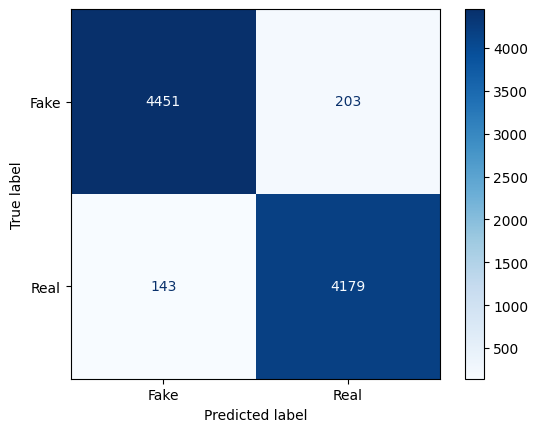

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



# Combine the datasets and add a label column
fake_news['label'] = 0  # 0 for Fake news
true_news['label'] = 1  # 1 for Real news
news_data = pd.concat([true_news, fake_news])

# Remove the “title”, “subject” and “date” columns
news_data = news_data.drop(columns=['title', 'subject', 'date'])

# Randomly shuffle the data frame
news_data = news_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Function to preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs and links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove special characters and punctuation
    text = re.sub(r'\@\w+|\#|\d+|[^A-Za-z0-9 ]+', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the preprocessing function to the text data
news_data['text'] = news_data['text'].apply(preprocess_text)

# Initialize the CountVectorizer with English stop words
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the text data
X = vectorizer.fit_transform(news_data['text'])

# Labels
y = news_data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model (e.g., Multinomial Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


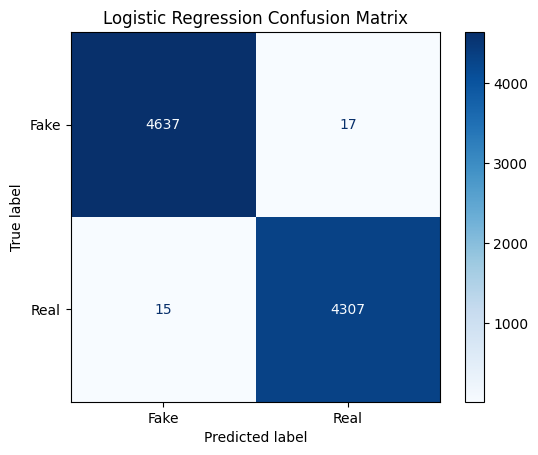

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load and preprocess the dataset (as previously done)
# ... [same preprocessing steps as before]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


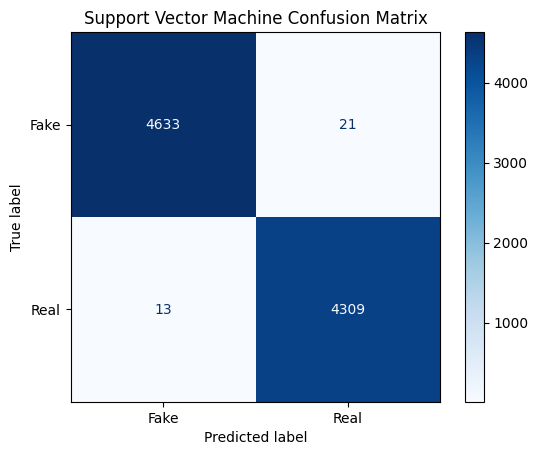

In [ ]:
from sklearn.svm import SVC

# Train the Support Vector Machine model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Support Vector Machine Confusion Matrix')
plt.show()


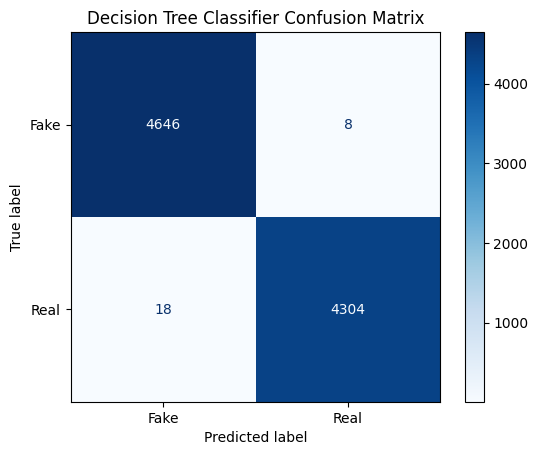

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()


In [ ]:
pip install pandas scikit-learn matplotlib


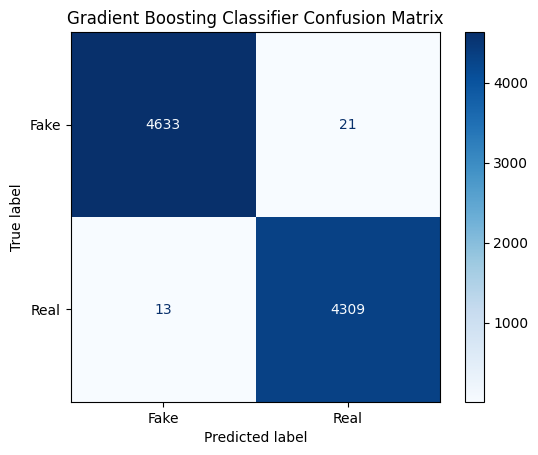

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.show()


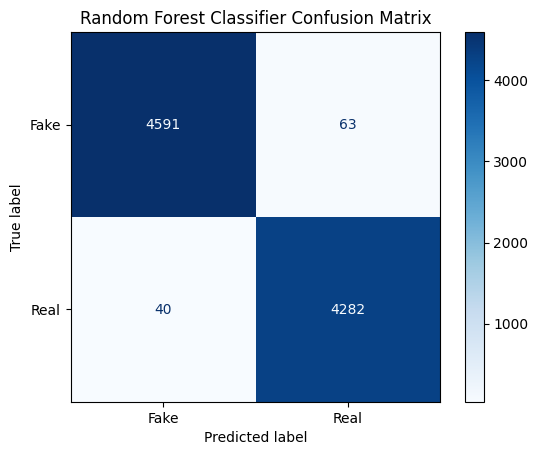

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Classifier Confusion Matrix')
plt.show()


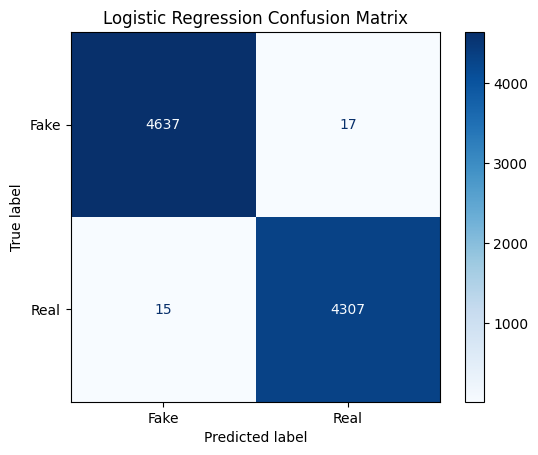

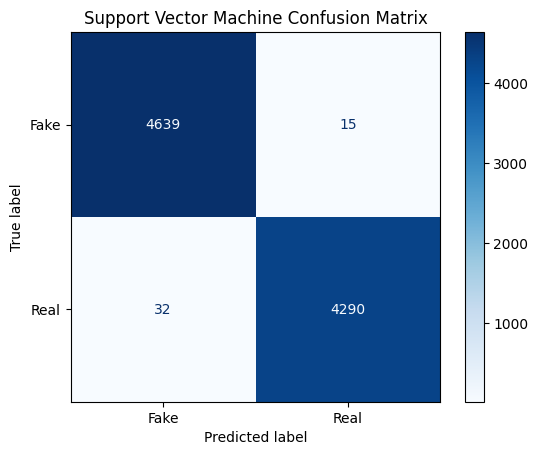

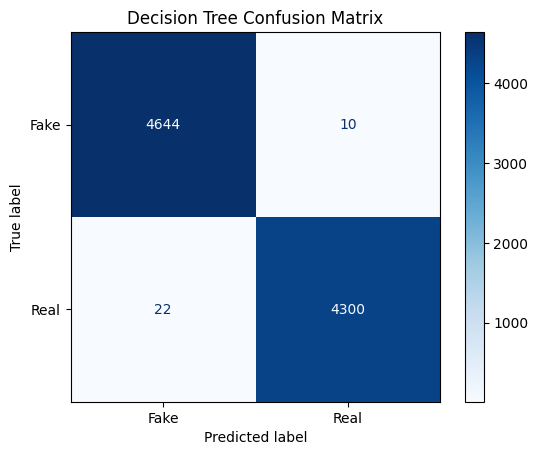

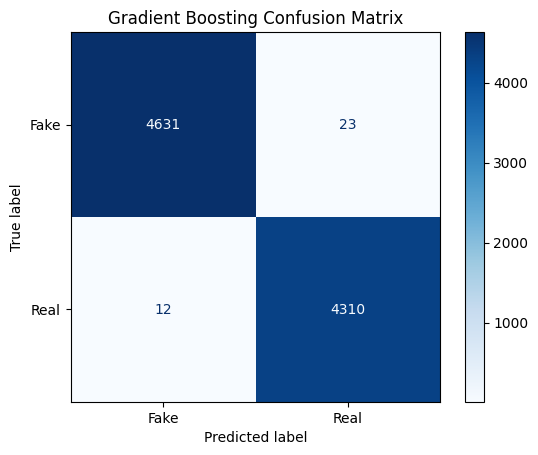

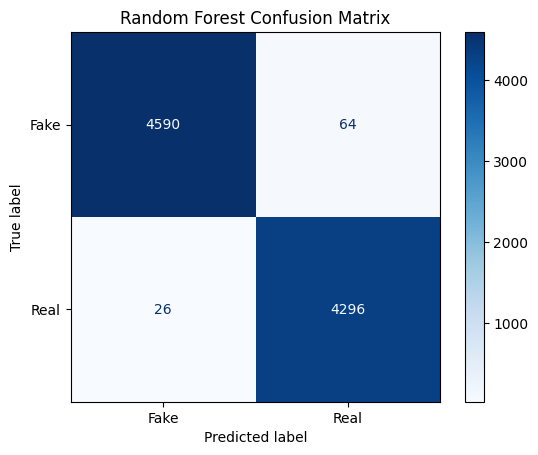

                    Model  Accuracy
0     Logistic Regression  0.996435
1  Support Vector Machine  0.994764
2           Decision Tree  0.996435
3       Gradient Boosting  0.996101
4           Random Forest  0.989973


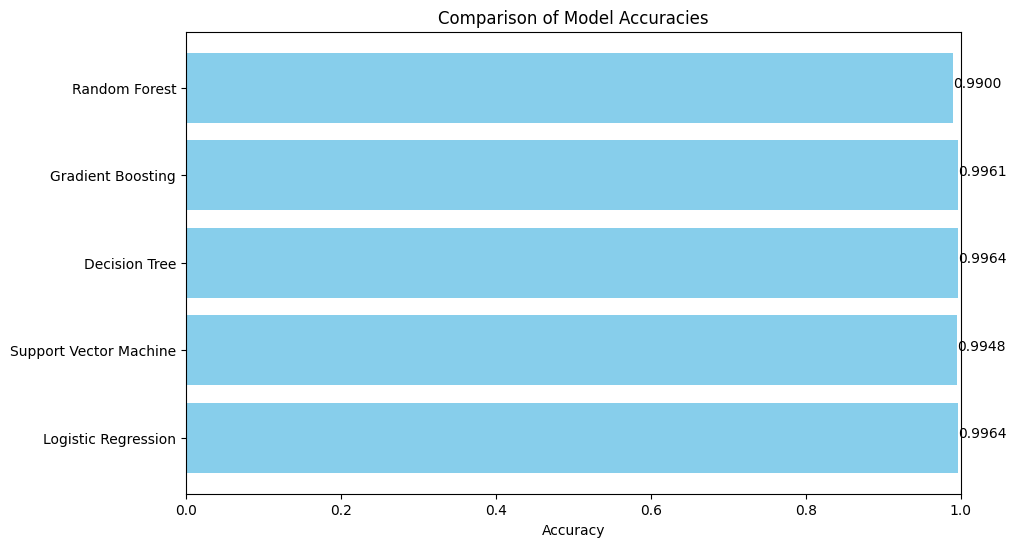

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



# Apply the preprocessing function to the text data
news_data['text'] = news_data['text'].apply(preprocess_text)

# Initialize the CountVectorizer with English stop words
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the text data
X = vectorizer.fit_transform(news_data['text'])

# Labels
y = news_data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
accuracy_results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


# Display the accuracy results
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])
print(accuracy_df)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.barh(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xlim(0, 1)
for index, value in enumerate(accuracy_df['Accuracy']):
    plt.text(value, index, f"{value:.4f}")
plt.show()


In [8]:
# Paths to save the model and vectorizer
model_path = 'F:/project/fake_news_model.pkl'
vectorizer_path = 'F:/project/count_vectorizer.pkl'

# Ensure the directory exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the trained model
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open(vectorizer_path, 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)


In [10]:
# Load the trained model and vectorizer from the respective pickle files
with open(model_path, 'rb') as model_file:
    model = pickle.load(model_file)

with open(vectorizer_path, 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)


In [12]:
# Function to clean and preprocess new text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', str(text))  # Replace non-alphanumeric characters with space
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Replace single character words with space
    text = re.sub(r'\s+', ' ', text, flags=re.I)  # Replace multiple spaces with single space
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Function to predict fake news
def predict_fake_news(article):
    cleaned_article = clean_text(article)
    article_vectorized = vectorizer.transform([cleaned_article]).toarray()
    prediction = model.predict(article_vectorized)
    return "Fake News" if prediction[0] == 0 else "Real News"


In [13]:
# Example article for testing
article = """
A recent study published in the Journal of Environmental Health found that exposure to air pollution can increase the risk of cardiovascular disease. The study, which analyzed data from over 100,000 participants, found that people who lived in areas with high levels of air pollution were more likely to develop heart disease. The researchers concluded that reducing air pollution could be an effective way to reduce the risk of cardiovascular disease.
"""

# Predict if the article is fake news
prediction = predict_fake_news(article)
print(f'The article is predicted to be: {prediction}')


The article is predicted to be: Real News
